<a href="https://colab.research.google.com/github/EyaRIAHI-BE/Soft-Computing-Projects/blob/main/Fuzzy_Logic_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 11.8 MB/s eta 0:00:00


Importation des bibliothèques

In [ ]:
import skfuzzy as fuzz

import numpy as np

import matplotlib.pyplot as plt

import skfuzzy.control as ctrl

# Partie 1 : Diagnostic d’hypertension artérielle en fonction du PAS

Définition de l'univers de discours pour la pression systolique

In [ ]:
PAS = np.arange(80, 201, 1)
P_sys = ctrl.Antecedent(PAS, 'P_sys')

Définition des fonctions d'appartenance
triangulaires  pour les différentes catégories  de la pression systolique

In [ ]:
P_sys ['basse'] = fuzz.trimf(PAS, [80,95,110])
P_sys ['normale'] = fuzz.trimf(PAS, [100,120,140])
P_sys ['élevée'] = fuzz.trimf(PAS, [130,165,200])

Définition de l'univers de discours pour le risque


In [ ]:
x_Risque = np.arange(0, 101, 1) #pourcentage 0->100
Risque = ctrl.Consequent(x_Risque, 'Risque')

Définition des fonctions d'appartenance triangulaires pour les différentes catégories du risque

In [ ]:
Risque['faible'] = fuzz.trimf(x_Risque, [0,20,40])
Risque['modéré'] = fuzz.trimf(x_Risque, [30,50,70])
Risque['élevé'] = fuzz.trimf(x_Risque, [60,80,100])

Énoncé des règles de base du système flou

In [ ]:
rule1 = ctrl.Rule(P_sys['basse'],Risque['faible'])
rule2 = ctrl.Rule(P_sys['normale'],Risque[ 'modéré'])
rule3 = ctrl.Rule(P_sys['élevée'],Risque['élevé'])

Construction dusystème d'inférence floue


In [ ]:
Sys_diagnostic = ctrl.ControlSystem([rule1, rule2, rule3])

In [ ]:
sim = ctrl.ControlSystemSimulation(Sys_diagnostic)

In [ ]:
sim.input['P_sys'] =120 #Attribution d'une valeur de pression (120 mmHg)
sim.compute()

Affichage de l'entrée et du résultat numérique estimé pour
le risque.


In [ ]:
print('la pression =', sim.input)
print('Risque estimé =', f"{sim.output['Risque']:.3f}", '%')

la pression = P_sys : 120

Risque estimé = 50.000 %


Visualisation des fonctions d'appartenance
des variables d'entrée et de sortie

Text(0, 0.5, "Degré d'appartenance")

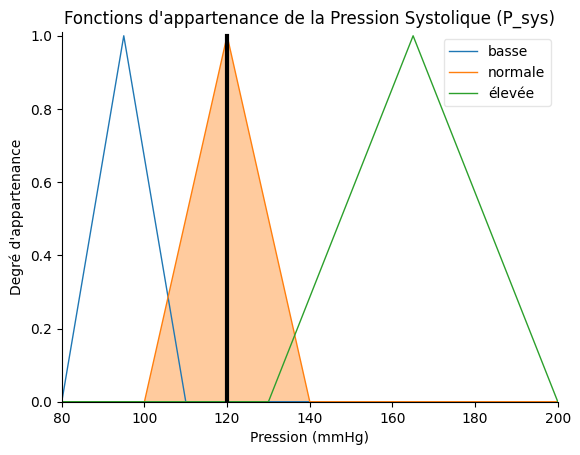

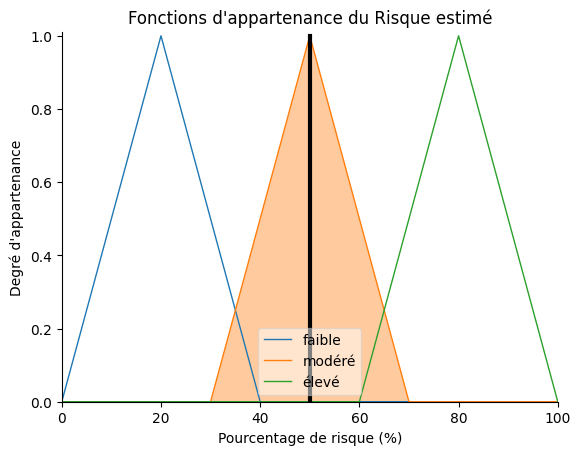

In [ ]:
P_sys.view(sim ,sim)
plt.title("Fonctions d'appartenance de la Pression Systolique (P_sys)")
plt.xlabel("Pression (mmHg)")
plt.ylabel("Degré d'appartenance")

Risque.view(sim=sim)
plt.title("Fonctions d'appartenance du Risque estimé")
plt.xlabel("Pourcentage de risque (%)")
plt.ylabel("Degré d'appartenance")


# Partie 2 : Diagnostic d’hypertension artérielle en fonction du PAS et PAD

Définition de l'univers de discours pour la pression diastolique

In [ ]:
x_pad = np.arange(50, 121, 1)
PAD = ctrl.Antecedent(x_pad, "PAD" )

Définition des fonctions d'appartenance
triangulaires  pour les différentes catégories  de la pression diastolique

In [ ]:
PAD['basse' ] = fuzz.trimf(PAD.universe, [50, 60, 70])
PAD['normale' ] = fuzz.trimf(PAD.universe, [65, 77.5, 90])
PAD['élevée' ] = fuzz.trimf(PAD.universe, [85, 100, 121])

In [ ]:
rule1 = ctrl.Rule(PAS['normale'] & PAD['normale'], risque['faible'])
rule2 = ctrl.Rule(PAS['élevée'] | PAD['élevée'], risque['modéré'])
rule3 = ctrl.Rule(PAS['élevée'] & PAD['élevée'], risque['élevé'])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
systeme = ctrl.ControlSystem([rule1, rule2, rule3])
sim = ctrl.ControlSystemSimulation(systeme)
sim.input['PAS'] = 120
sim.input['PAD'] = 80
sim.compute()

print(f"Risque évalué : {sim.output['risque']:.2f}%")

PAS.view(sim=sim)
plt.title("Fonctions d'appartenance de la Pression Artérielle Systolique (PAS)")
plt.xlabel("Pression (mmHg)")
plt.ylabel("Degré d'appartenance")
plt.show()

PAD.view(sim=sim)
plt.title("Fonctions d'appartenance de la Pression Artérielle Diastolique (PAD)")
plt.xlabel("Pression (mmHg)")
plt.ylabel("Degré d'appartenance")
plt.show()

risque.view(sim=sim)
plt.title("Fonctions d'appartenance du Risque estimé")
plt.xlabel("Pourcentage de risque (%)")
plt.ylabel("Degré d'appartenance")
plt.show()